# Abalone Case Study

Greetings!!!

Today we will be working on abalone dataset.
 - Exploratary Data Analysis
 - K Means Clustering
 - Classification models
 - Hyperparameter Tuning
 - Final Result
 - Cross Validation Score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df = pd.read_csv('abalone.data',header = None, names = cols)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

## Label Encoding Sex Column

In [5]:
from  sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['Sex'] = lbl.fit_transform(df['Sex'])
keys  = lbl.classes_
values = lbl.transform(lbl.classes_)
mapping = dict()
dictionary = dict(zip(keys, values))
print(dictionary)
df.head()

{'F': 0, 'I': 1, 'M': 2}


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## EDA

<AxesSubplot:>

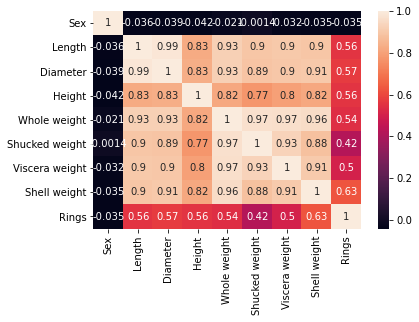

In [6]:
sns.heatmap(df.corr(),annot = True)

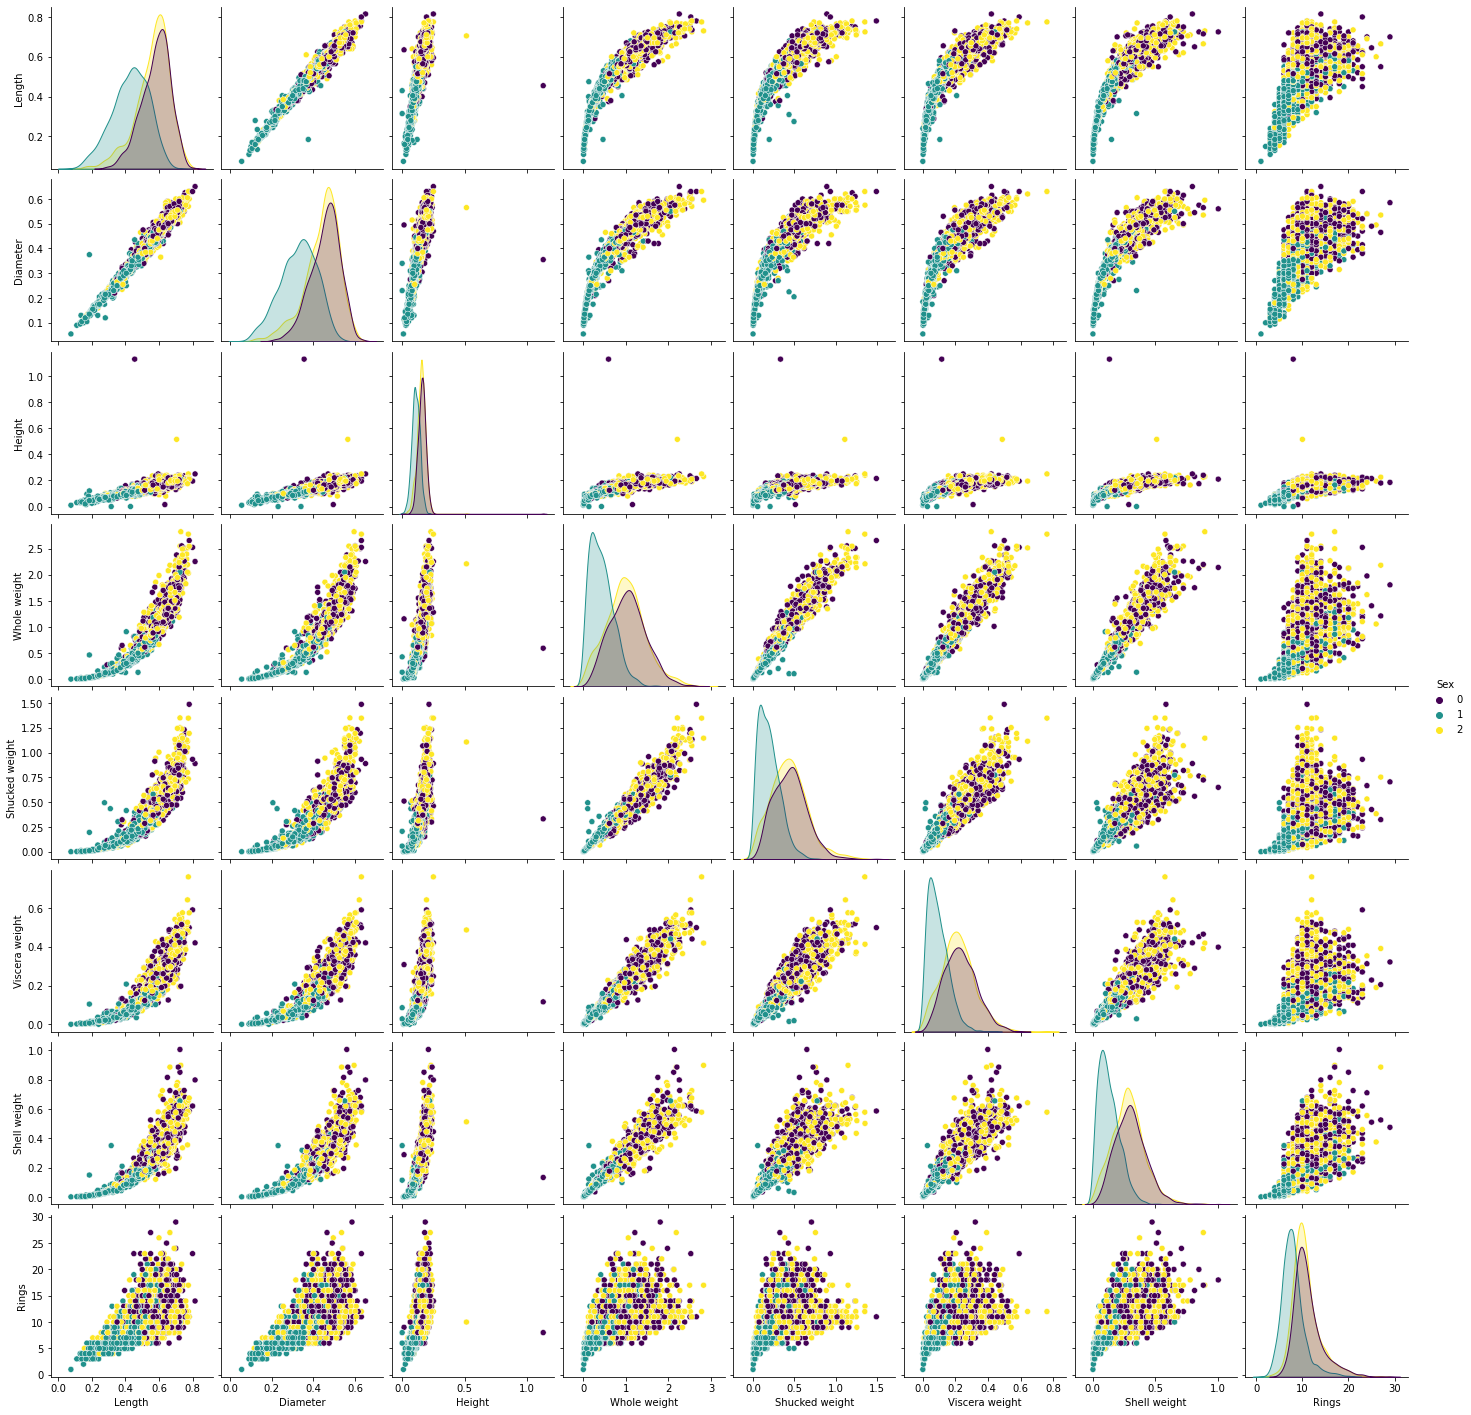

In [7]:
sns.pairplot(data=df, hue='Sex',palette ='viridis')

Text(0.5, 1.0, 'Sex Count Plot')

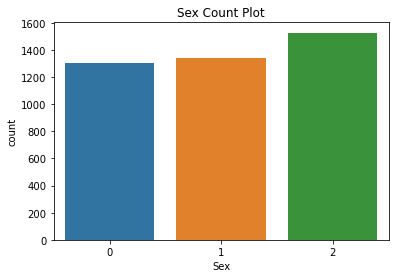

In [8]:
sns.countplot(df['Sex'])
plt.title('Sex Count Plot')

Text(0.5, 1.0, 'Sex Count Plot')

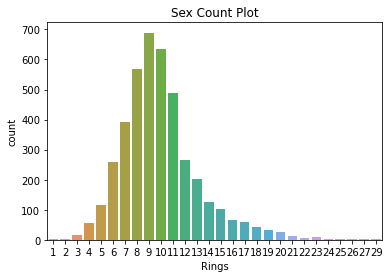

In [9]:
sns.countplot(df['Rings'])
plt.title('Sex Count Plot')

<AxesSubplot:xlabel='Sex', ylabel='Diameter'>

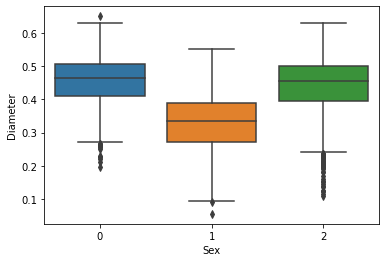

In [10]:
sns.boxplot(x = 'Sex', y = 'Diameter', data = df)

<AxesSubplot:xlabel='Sex', ylabel='Shucked weight'>

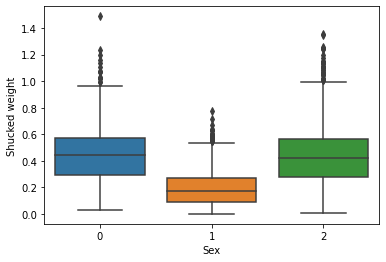

In [11]:
sns.boxplot(x = 'Sex', y = 'Shucked weight', data = df)

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

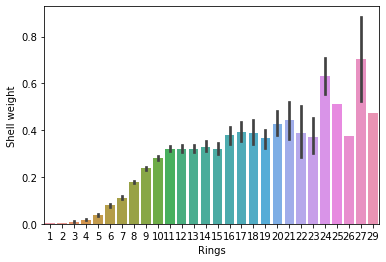

In [12]:
sns.barplot(x = 'Rings', y = 'Shell weight', data= df)

## Kmeans (Elbow Method)

In [13]:
x = df.iloc[:,1:].values

In [14]:
import scipy.cluster.hierarchy as sch

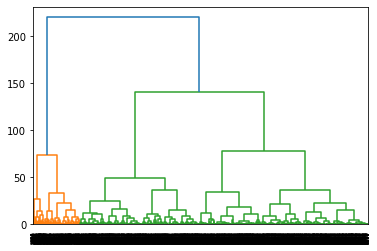

In [15]:
lk = sch.linkage(df,method='ward')
ddg = sch.dendrogram(lk)

Looking at the dendrogram we conclude that there are 3 clusters

In [16]:
from sklearn.cluster import KMeans

In [17]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[44860.378975952,
 18861.998927978846,
 9889.828962494752,
 6340.081927459619,
 4384.82991662735,
 3432.7945039764345,
 2706.8677666982135,
 2362.5527104006355,
 2020.058568116688,
 1696.6746706809047]

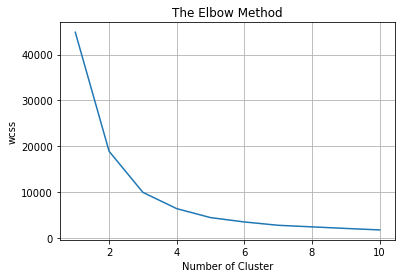

In [19]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.grid()
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

Looking at the elbow diagram we conclude there are 3 clusters

In [20]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
ykmeans = kmeans.fit_predict(x)

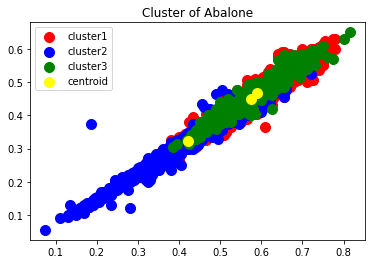

In [21]:
plt.scatter(x[ykmeans==0,0],x[ykmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[ykmeans==1,0],x[ykmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[ykmeans==2,0],x[ykmeans==2,1],s=100,c='green',label='cluster3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='centroid')

plt.title('Cluster of Abalone')
plt.legend()
plt.show()

## Preprocessing

In [22]:
df['YKM']=ykmeans

<AxesSubplot:>

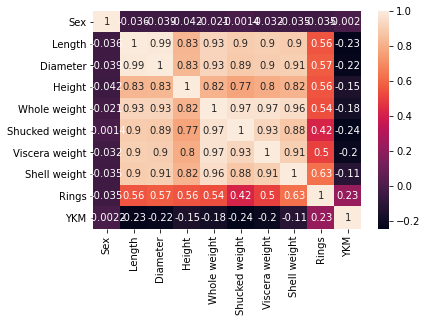

In [53]:
sns.heatmap(df.corr(),annot = True)

In [23]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,YKM
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [24]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.35, random_state=0, stratify=y)

## Model Creation

In [27]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    ac = accuracy_score(ytest,ypred)
    cr = classification_report(ytest,ypred)
    print(f'Accuracy Score  :  {ac}\n\nClassification Report   : {cr}')

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [29]:
from sklearn.metrics import accuracy_score, classification_report

In [30]:
models = []

models.append(("Logreg        :- ", LogisticRegression()))
models.append(("KNN           :- ", KNeighborsClassifier()))
models.append(("SVM           :- ", SVC()))
models.append(("DecisionTree  :- ", DecisionTreeClassifier()))


for name, model in models:
    print(name)
    mymodel(model)
    print("\n\n\n")

Logreg        :- 
Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462





KNN           :- 
Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462





SVM           :- 
Accuracy Score  :  1.0

Classification Report   :               precision   

Note: The accuracy of all the models is already 1, there is no scope for hyperparameter tuning. But since this is for test submission and I need to show the hyperparameter tuning steps, the same is detailed below

## Hyperparameter Tuning

### Logistic Regression

In [31]:
logregs = []

logregs.append(("LogregLin        :- ", LogisticRegression(solver = 'liblinear')))
logregs.append(("LogregLbf        :- ", LogisticRegression(solver = 'lbfgs')))
logregs.append(("LogregNcg        :- ", LogisticRegression(solver = 'newton-cg')))

for name, model in logregs:
    print(name)
    mymodel(model)
    print("\n\n\n")

LogregLin        :- 
Accuracy Score  :  0.939124487004104

Classification Report   :               precision    recall  f1-score   support

           0       0.91      0.98      0.95       798
           1       0.99      0.94      0.96       492
           2       0.94      0.75      0.83       172

    accuracy                           0.94      1462
   macro avg       0.95      0.89      0.91      1462
weighted avg       0.94      0.94      0.94      1462





LogregLbf        :- 
Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462





LogregNcg        :- 
Accuracy Score  :  1.0

Classification Report   :    

In [32]:
logreg = LogisticRegression()
mymodel(logreg)

Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



### KNN

In [33]:
accuracy=[]
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

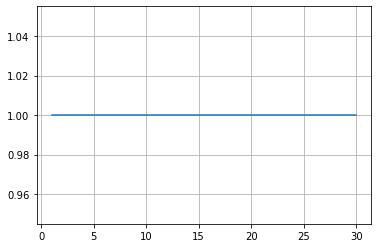

In [34]:
plt.plot(range(1,31), accuracy)
plt.grid(True)
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
mymodel(knn)

Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



### SVM

In [36]:
svms = []
svms.append(("SVMlin           :- ", SVC(kernel = 'linear')))
svms.append(("SVMpol          :- ", SVC(kernel = 'poly')))
svms.append(("SVMrbf           :- ", SVC(kernel = 'rbf')))

for name, model in svms:
    print(name)
    mymodel(model)
    print("\n\n\n")

SVMlin           :- 
Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462





SVMpol          :- 
Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462





SVMrbf           :- 
Accuracy Score  :  1.0

Classification Report   :               prec

In [37]:
svm = SVC()
mymodel(svm)

Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



### Decision Tree Classifier

In [38]:
accuracy=[]
for i in range(1,50):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(xtrain, ytrain)
    ypred=dt.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

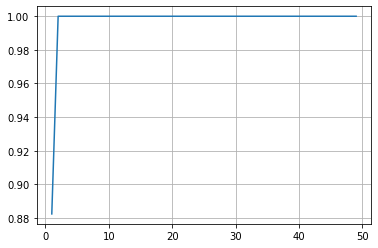

In [39]:
plt.plot(range(1,50), accuracy)
plt.grid(True)
plt.show()

In [40]:
accuracy=[]
for i in range(1,60):
    dt=DecisionTreeClassifier(min_samples_leaf=i)
    dt.fit(xtrain, ytrain)
    ypred=dt.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

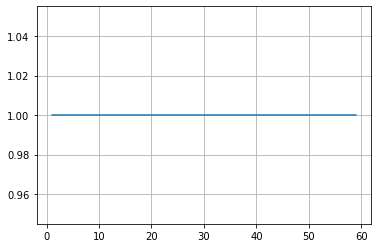

In [41]:
plt.plot(range(1,60), accuracy)
plt.grid(True)
plt.show()

In [42]:
dt3 = DecisionTreeClassifier(max_depth=7 ,min_samples_leaf=50)
mymodel(dt3)

Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



In [43]:
accuracy=[]
for i in range(1,50):
    dt=DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    dt.fit(xtrain, ytrain)
    ypred=dt.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

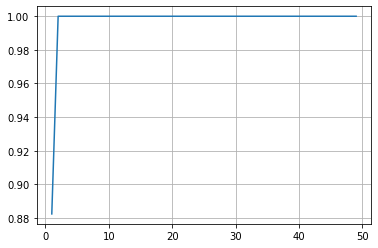

In [44]:
plt.plot(range(1,50), accuracy)
plt.grid(True)
plt.show()

In [45]:
dt4 = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
mymodel(dt4)

Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



In [46]:
accuracy=[]
for i in range(1,60):
    dt=DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=i)
    dt.fit(xtrain, ytrain)
    ypred=dt.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

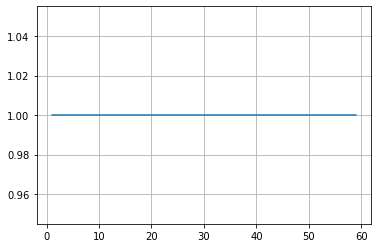

In [47]:
plt.plot(range(1,60), accuracy)
plt.grid(True)
plt.show()

In [48]:
dt5 = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=50)
mymodel(dt5)

Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



In [49]:
dt6 = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
mymodel(dt6)

Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



## Final Model

In [50]:
models = []

models.append(("Logreg        :- ", LogisticRegression()))
models.append(("KNN           :- ", KNeighborsClassifier(n_neighbors=5)))
models.append(("SVM           :- ", SVC()))
models.append(("DecisionTree  :- ", DecisionTreeClassifier(criterion = 'entropy', max_depth=3)))


for name, model in models:
    print(name)
    mymodel(model)
    print("\n\n\n")

Logreg        :- 
Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462





KNN           :- 
Accuracy Score  :  1.0

Classification Report   :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       172

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462





SVM           :- 
Accuracy Score  :  1.0

Classification Report   :               precision   

## CVS Score

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
for name, model in models:
    print(name)
    cvs = cross_val_score(model,x,y,cv=5,scoring='accuracy')
    print(cvs.mean())
    print("\n\n\n")

Logreg        :- 
1.0




KNN           :- 
1.0




SVM           :- 
1.0




DecisionTree  :- 
1.0




